<a href="https://colab.research.google.com/github/hawkilol/ShellQuickHeapSort/blob/main/ShellQuickHeapSort03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [291]:
import time
import matplotlib.pyplot as plt
import numpy as np


In [292]:
#Com a media

In [293]:
%%writefile sort.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <math.h>

int getBig(int *a, int i, int right, int pivot)
{
    for (int k = i; k <= right; k++)
    {
        if (a[k] > pivot)
            return k;
    }
    return right + 1;
}

int getSmall(int *a, int j, int left, int pivot)
{
    for (int k = j; k >= left; k--)
    {
        if (a[k] < pivot)
            return k;
    }
    return -1;
}

void swap(int *a, int *b)
{
    int t = *a;
    *a = *b;
    *b = t;
}

void random_quick(int *a, int left, int right)
{
    if (left >= right)
        return;
    int index = left + (rand() % (right - left)), i = left, j = right;
    int pivot_index = index;
    int pivot = a[index];
    i = getBig(a, i, right, pivot);
    j = getSmall(a, j, left, pivot);
    while (i <= j)
    {
        swap(&a[i], &a[j]);
        i = getBig(a, i, right, pivot);
        j = getSmall(a, j, left, pivot);
    }

    if (pivot_index > j && pivot_index > i)
    {
        swap(&a[i], &a[pivot_index]);
        random_quick(a, left, i - 1);
        random_quick(a, i + 1, right);
    }
    else if (pivot_index < j && pivot_index < i)
    {
        swap(&a[j], &a[pivot_index]);
        random_quick(a, left, j - 1);
        random_quick(a, j + 1, right);
    }
    else
    {
        
        random_quick(a, left, pivot_index - 1);
        random_quick(a, pivot_index + 1, right);
    }
}

  


//heapsort
 


//void swap(int* a, int* b)
//{
 
//    int temp = *a;
 
//    *a = *b;
 
//    *b = temp;
//}
 
void heapify(int arr[], int N, int i)
{
    int largest = i;
    int left = 2 * i + 1;
    int right = 2 * i + 2;
 
    if (left < N && arr[left] > arr[largest])
 
        largest = left;
    if (right < N && arr[right] > arr[largest])
 
        largest = right;
    if (largest != i) {
 
        swap(&arr[i], &arr[largest]);
 
        heapify(arr, N, largest);
    }
}
 

void heapSort(int arr[], int N)
{
 
    // max heap
    for (int i = N / 2 - 1; i >= 0; i--)
 
        heapify(arr, N, i);
 
    // Heap sort
    for (int i = N - 1; i >= 0; i--) {
 
        swap(&arr[0], &arr[i]);
        heapify(arr, i, 0);
    }
}


//shellsort

void shellSort(int array[], int n) {
  for (int interval = n / 2; interval > 0; interval /= 2) {
    for (int i = interval; i < n; i += 1) {
      int temp = array[i];
      int j;
      for (j = i; j >= interval && array[j - interval] > temp; j -= interval) {
        array[j] = array[j - interval];
      }
      array[j] = temp;
    }
  }
}

int main(){
  FILE *fpt;
  int n = 10000;
  int arr1[n];
  double timesShell[n];
  double timesQuick[n];
  double timesHeap[n];
  for(int i = 0; i < n; i++){
    timesShell[i] = 0;
    timesQuick[i] = 0;
    timesHeap[i] = 0;

  }

  int arr[n];

  clock_t start;
  clock_t stop;
  double end;
  
  for(int i = 0; i<n; i++){
    arr1[i] = rand()%10000;
    //arr1[i] = 1;
    printf("%d\n", arr1[i]);
  }
  //Ja ordenado !
  //random_quick(arr1, 0, n-1);
  //reverse
  int temp;
  //for(int i = 0; i<n/2; i++){
  //    temp = arr1[i];
  //    arr1[i] = arr1[n-i-1];
  //    arr1[n-i-1] = temp;
  //    printf("%d\n", arr1[i]);
  //}
  
  int avgCount = 10;

  for(int k = 0; k < avgCount; k++){

    for(int i = 0; i<n; i++){

      for(int j = 0; j<i; j++){
        arr[j] = arr1[j];
      }

      start = clock();

    
      random_quick(arr, 0, i -1);
      stop = clock();

      end = (double) (stop - start) / CLOCKS_PER_SEC;
      timesQuick[i] = timesQuick[i] + end;

      for(int j = 0; j<i; j++){
        arr[j] = arr1[j];
      }
      start = clock();
      shellSort(arr, i);
      stop = clock();
    
      end = (double) (stop - start) / CLOCKS_PER_SEC;
      timesShell[i] = timesShell[i] + end;
    
      for(int j = 0; j<i; j++){
        arr[j] = arr1[j];
      }
      start = clock();
    
      heapSort(arr,i);
      stop = clock();
    
      end = (double) (stop - start) / CLOCKS_PER_SEC;
      timesHeap[i] = timesHeap[i] + end;

      printf("%d\n", i);

    }
    
    
  }
  //double avgShell[n];
  //double avgQuick[n];
  //double avgHeap[n];
  

  for(int i = 0; i<n; ++i){
    timesShell[i] = timesShell[i] / avgCount;
    timesQuick[i] = timesQuick[i] / avgCount;
    timesHeap[i] = timesHeap[i] / avgCount;
  }

  

  fpt = fopen("TimeSorts.csv", "w+");
  fprintf(fpt,"Shell,Quick,Heap\n");
    for(int i = 0; i<n; i++){
      fprintf(fpt,"%f,%f,%f\n", timesShell[i], timesQuick[i], timesHeap[i]);
    }

  fclose(fpt);
}


Overwriting sort.c


In [294]:
%%shell
ls
gcc sort.c -o sort
./sort

A saída de streaming foi truncada nas últimas 5000 linhas.
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5

In [295]:
%%shell 
pwd

/content


In [296]:
%%shell

ls

sample_data  sort  sort.c  TimeSorts.csv


In [297]:
#upload to csv com o git

In [298]:
%%shell
ls

sample_data  sort  sort.c  TimeSorts.csv


sample_data  sort  sort.c  TimeSorts.csv


In [301]:
%%shell
ls
#gdrive help
cd sample_data
ls

sample_data  sort  sort.c  TimeSorts.csv
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [302]:
import pandas as pd
import io

#df = pd.read_csv(io.StringIO(uploaded['california_housing_train.csv'].decode('utf-8')))
df = pd.read_csv('/content/TimeSorts.csv')


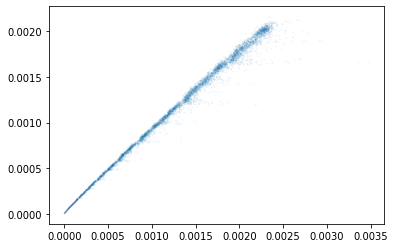

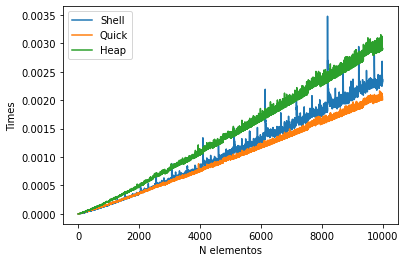

In [303]:

plt.scatter(df.Shell, df.Quick, df.Heap)
plt.show()

%matplotlib inline
plt.xlabel("N elementos")
plt.ylabel("Times")
plt.plot(df.Shell, label='Shell')
plt.plot(df.Quick, label='Quick')
plt.plot(df.Heap, label='Heap')
plt.legend()
plt.show()

In [304]:
#PIOR CASO DO SHELL relacionado ao numero de elementos 

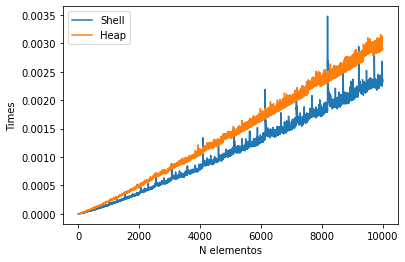

In [305]:
%matplotlib inline
plt.xlabel("N elementos")
plt.ylabel("Times")
plt.plot(df.Shell, label='Shell')
#plt.plot(df.Quick, label='Quick')
plt.plot(df.Heap, label='Heap')
plt.legend()
plt.show()

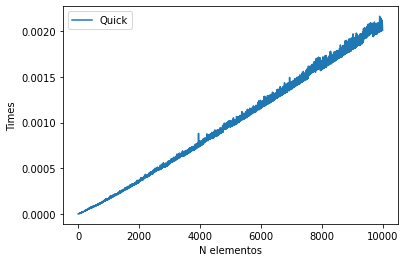

In [306]:
%matplotlib inline
plt.xlabel("N elementos")
plt.ylabel("Times")
#plt.plot(df.Shell, label='Shell')
plt.plot(df.Quick, label='Quick')
#plt.plot(df.Heap, label='Heap')
plt.legend()
plt.show()

In [307]:
# FILE *fpt;

# fpt = fopen("MyFile.csv", "w+");
# fprintf(fpt,"ID, Name, Email, Phone Number\n");
# fprintf(fpt,"%d, %s, %s, %s\n", id, name, email, phone);
# fclose(fpt);

In [308]:
#shellsort
#n = len(arr)
def shellSort(arr,n):
  gap = n // 2
  
  while gap > 0:
    j=gap
    while j<n:
      i=j-gap
      while i>=0:
        if arr[i+gap]>arr[i]:
          break
        else:
          #arr[i+gap] =arr[i]
          #arr[i] = arr[i+gap]
          arr[i+gap],arr[i]=arr[i],arr[i+gap]
  
        i=i-gap
      j+=1
    gap = gap // 2


In [309]:
%%shell 
ls

sample_data  sort  sort.c  TimeSorts.csv


In [310]:
#heapsort
def heapify(arr,n,i):#peneira
  largest = i
  l = 2*i + 1
  r = 2*i + 2

  if l < n and arr[largest] < arr[l]:
    largest = l
  
  if r < n and arr[largest] < arr[r]:
    largest = r
  
  if largest != i:
    #arr[i], arr[largest] = arr[largest], arr[i]
    arr[i] = arr[largest]
    arr[largest] = arr[i]

    heapify(arr,n,largest)

def heapSort(arr):
  n = len(arr)

  for i in range(n//2 -1,-1,-1):
    heapify(arr,n,i)
  
  for i in range(n-1,0,-1):
    arr[i], arr[0] = arr[0], arr[i]
    
    heapify(arr,i,0)




In [311]:
#quicksort rand pivo
# def partitionRand(arr, low, high):

#   randIndex = np.random.randint(low, high)
#   pivo = arr[randIndex]

#   i = low -1

#   for j in range(low, high):
#     if arr[j] <= pivo:

#       i = i+1
#       arr[i] = arr[j]
#       arr[j] = arr[i]

#   #arr[i+1] = arr[high]
#   #arr[high] = arr[i+1]
#   (arr[i + 1], arr[high]) = (arr[high], arr[i + 1])

#   return i+1

def partitionRand(arr, low, high):

  randIndex = np.random.randint(low, high)
  
  arr[low], arr[randIndex] =\
        arr[randIndex], arr[low]

  return partition(arr, low, high)


#partition ultimo
# def partition(arr, low, high):
#   pivo = arr[high]

#   i = low -1

#   for j in range(low, high):
#     if arr[j] <= pivo:

#       i = i+1
#       arr[i] = arr[j]
#       arr[j] = arr[i]

#   arr[i+1] = arr[high]
#   arr[high] = arr[i+1]

#   return i+1
def partition(arr,start,stop):
    pivot = start # pivot
    i = start - 1
    j = stop + 1
    while True:
        while True:
            i = i + 1
            if arr[i] >= arr[pivot]:
                break
        while True:
            j = j - 1
            if arr[j] <= arr[pivot]:
                break
        if i >= j:
            return j
        arr[i] , arr[j] = arr[j] , arr[i]
  

# def quickSort(arr, low, high):
#   if low < high:

#     pivoI = partitionRand(arr, low, high)

#     quickSort(arr, low, pivoI - 1)

#     quickSort(arr, pivoI + 1, high)
def quickSort(arr, low, high):
  if low < high:

    pivoI = partitionRand(arr, low, high)

    quickSort(arr, low, pivoI)

    quickSort(arr, pivoI + 1, high)

In [312]:
arr = [1,2,3,4,5,6,7,8]
print(arr[:1],len(arr[:1]))
print(shellSort(arr,len(arr)))


[1] 1
None
